[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Total sentences in Brown corpus: 57340


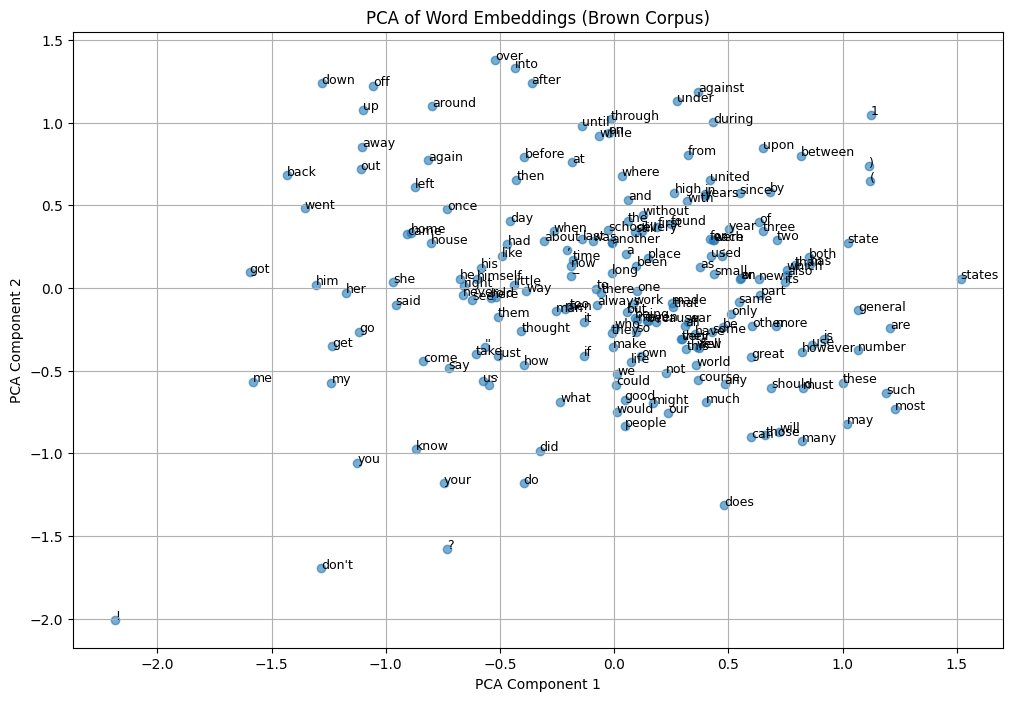

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


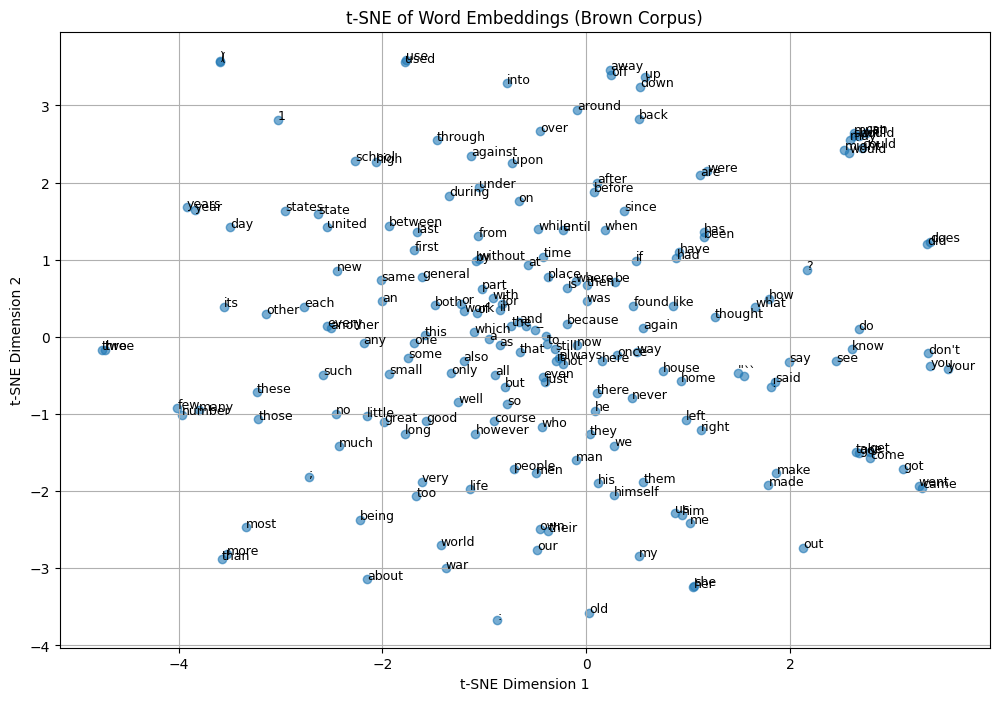

In [1]:

import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.corpus import brown
from collections import Counter

# Download Brown corpus
nltk.download('brown')

# Load and preprocess the Brown corpus
sentences = brown.sents()
print(f"Total sentences in Brown corpus: {len(sentences)}")

# Train Word2Vec model on the Brown corpus
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, sg=1, epochs=20)

# Extract most frequent words
word_freq = Counter(word.lower() for sent in sentences for word in sent)
most_common_words = [word for word, freq in word_freq.most_common(200) if word in model.wv]

# Get embeddings for these words
word_vectors = np.array([model.wv[word] for word in most_common_words])

# --- PCA Visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
for i, word in enumerate(most_common_words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=9)
plt.title("PCA of Word Embeddings (Brown Corpus)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# --- t-SNE Visualization ---
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6)
for i, word in enumerate(most_common_words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=9)
plt.title("t-SNE of Word Embeddings (Brown Corpus)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()